# Compara os resultados da analise do designite e dos arquivos modificados

# Release: cassandra-3.1

In [21]:
import pandas as pd
import util_designite

In [22]:
df_architecture_smells_v_3_1_0 = util_designite.init_df_architecture_smell_analysis(versao='3.1.0')
df_architecture_smells_v_3_1_0.head(3)

,Project Name,Package Name,Architecture Smell,Cause of the Smell
0,v-3-1-0,org.apache.cassandra.metrics,God Component,The tool detected the smell in this component ...
1,v-3-1-0,org.apache.cassandra.metrics,Cyclic Dependency,The tool detected the smell in this component ...
2,v-3-1-0,org.apache.cassandra.metrics,Cyclic Dependency,The tool detected the smell in this component ...


In [23]:
df_design_smells_v_3_1_0 = util_designite.init_df_design_smell_analysis(versao='3.1.0')
df_design_smells_v_3_1_0.head(3)

,Project Name,Package Name,Type Name,Design Smell,Cause of the Smell
0,v-3-1-0,org.apache.cassandra.metrics,EstimatedHistogramReservoir,Unutilized Abstraction,The tool detected the smell in this class beca...
1,v-3-1-0,org.apache.cassandra.metrics,LatencyMetrics,Unutilized Abstraction,The tool detected the smell in this class beca...
2,v-3-1-0,org.apache.cassandra.metrics,LatencyMetrics,Deficient Encapsulation,The tool detected the smell in this class beca...


In [24]:
df_temp = df_design_smells_v_3_1_0.copy()
list_design_smell = list( df_temp['Design Smell'].unique() )
print(list_design_smell)


['Unutilized Abstraction', 'Deficient Encapsulation', 'Multifaceted Abstraction', 'Unnecessary Abstraction', 'Cyclically-dependent Modularization', 'Insufficient Modularization', 'Broken Modularization', 'Imperative Abstraction', 'Hub-like Modularization', 'Broken Hierarchy', 'Cyclic Hierarchy', 'Rebellious Hierarchy']


## --- Identificar os Architectural Smells ---

### 1. Quais registros correspondem a Cyclic Dependency?

### 1.1 Lista os pacotes que possuem dependência cíclica

#### Obs: O Designite java não mostra os arquivos (classes) com dependencia cíclica, só mostra os pacotes

In [25]:
list_cyclic_dependency_v_3_1_0 = util_designite.extract_list_of_architecture_smells(df_architecture_smells_v_3_1_0, util_designite.texto_padrao_Cyclic_Dependency)

print('Fragmento...')
i = 1
for each in list_cyclic_dependency_v_3_1_0:
    if i < 10:
        print(f'{i} {each[2]}')
        i += 1
    else:
        break

print('...')

Fragmento...
1  org.apache.cassandra.metrics; org.apache.cassandra.utils
2  org.apache.cassandra.metrics; org.apache.cassandra.utils; org.apache.cassandra.db
3  org.apache.cassandra.tracing; org.apache.cassandra.concurrent
4  org.apache.cassandra.tracing; org.apache.cassandra.utils; org.apache.cassandra.concurrent
5  org.apache.cassandra.tracing; org.apache.cassandra.utils; org.apache.cassandra.concurrent; org.apache.cassandra.service
6  org.apache.cassandra.locator; org.apache.cassandra.db
7  org.apache.cassandra.locator; org.apache.cassandra.gms; org.apache.cassandra.db
8  org.apache.cassandra.locator; org.apache.cassandra.gms; org.apache.cassandra.net; org.apache.cassandra.service
9  org.apache.cassandra.locator; org.apache.cassandra.gms; org.apache.cassandra.net; org.apache.cassandra.dht; org.apache.cassandra.service
...


### 2. Quais registros correspondem a Feature Concentration?

### 2.1 Lista os arquivos que possem Feature Concentration

In [26]:
list_feature_concentration_v_3_1_0 = util_designite.extract_list_of_architecture_smells(df_architecture_smells_v_3_1_0, util_designite.texto_padrao_Feature_Concentration)

print('Fragmento...')
i = 1
for each in list_feature_concentration_v_3_1_0:
    if i < 5:
        print(f'{i} {each[0]}, {each[2]}')
        i += 1
    else:
        break
print('...')

Fragmento...
1 org.apache.cassandra.metrics,  [EstimatedHistogramReservoir; HistogramSnapshot]; [LatencyMetrics]; [BufferPoolMetrics]; [MetricNameFactory; CassandraMetricsRegistry; DefaultNameFactory; ThreadPoolMetricNameFactory; KeyspaceMetrics; KeyspaceMetricNameFactory; ThreadPoolMetrics; TableMetrics; TableMetricNameFactory; AllTableMetricNameFactory]; [SEPMetrics]; [HintsServiceMetrics]; [DroppedMessageMetrics]; [CASClientRequestMetrics]; [ClientRequestMetrics]; [CompactionMetrics]; [ClearableHistogram]; [ViewWriteMetrics]; [ReadRepairMetrics]; [ConnectionMetrics]; [ClientMetrics]; [CacheMetrics]; [StreamingMetrics]; [GetHistogram]; [TableHistogram]; [TableTimer]; [StorageMetrics]; [MetricMBean]; [AbstractBean]; [JmxGaugeMBean]; [JmxGauge]; [JmxHistogramMBean]; [JmxHistogram]; [JmxCounterMBean]; [JmxCounter]; [JmxMeterMBean]; [JmxMeter]; [JmxTimerMBean]; [JmxTimer]; [MetricName]; [HintedHandoffMetrics]; [DifferencingCounter]; [RestorableMeter; RestorableEWMA]; [CQLMetrics]; [Commi

### 3. Quais registros correspondem a Unstable Dependency?

### 3.1 Lista os arquivos que possem Unstable Dependency

#### Obs: O Designite java não mostra os arquivos (classes) com dependencia instável, só mostra os pacotes

In [27]:
list_unstable_dependency_v_3_1_0 = util_designite.extract_list_of_architecture_smells(df_architecture_smells_v_3_1_0, util_designite.texto_padrao_Unstable_Dependency)

print('Fragmento...')
i = 1
for each in list_unstable_dependency_v_3_1_0:
    if i < 10:
        print(f'{i} {each[0]}, {each[2]}')
        i += 1
    else: 
        break
print('...')

Fragmento...
1 org.apache.cassandra.metrics,  org.apache.cassandra.db.compaction; org.apache.cassandra.io.sstable.metadata
2 org.apache.cassandra.tracing,  org.apache.cassandra.service; org.apache.cassandra.db.marshal; org.apache.cassandra.net; org.apache.cassandra.schema
3 org.apache.cassandra.net,  org.apache.cassandra.dht; org.apache.cassandra.repair.messages; org.apache.cassandra.gms; org.apache.cassandra.service.paxos; org.apache.cassandra.hints; org.apache.cassandra.batchlog; org.apache.cassandra.metrics; org.apache.cassandra.io.util; org.apache.cassandra.service; org.apache.cassandra.db; org.apache.cassandra.streaming.messages; org.apache.cassandra.streaming
4 org.apache.cassandra.transport,  org.apache.cassandra.service; org.apache.cassandra.db.marshal; org.apache.cassandra.auth; org.apache.cassandra.transport.messages
5 org.apache.cassandra.transport.messages,  org.apache.cassandra.cql3.statements; org.apache.cassandra.auth
6 org.apache.cassandra.cql3,  org.apache.cassandra.db

### 4. Quais registros correspondem a Scattered Functionality?

### 4.1 Lista os arquivos que possem Scattered Functionality

#### Obs: O Designite java não mostra os arquivos (classes) que possuem Scattered Functionality, só mostra os pacotes

In [28]:
list_Scattered_Functionality_v_3_1_0 = util_designite.extract_list_of_architecture_smells(df_architecture_smells_v_3_1_0, util_designite.texto_padrao_Scattered_functionality)

print('Fragmento...')
i = 1
for each in list_Scattered_Functionality_v_3_1_0:
    if i < 10:
        print(f'{i} {each[0]}, {each[2]}')
        i += 1
    else:
        break
print('...')

Fragmento...
1 org.apache.cassandra.service.pager,  org.apache.cassandra.db; org.apache.cassandra.db.filter.
2 org.apache.cassandra.service.pager,  org.apache.cassandra.db.rows; org.apache.cassandra.db; org.apache.cassandra.db.filter; org.apache.cassandra.utils.
3 org.apache.cassandra.service.pager,  org.apache.cassandra.db.filter; org.apache.cassandra.db.rows.
...


### 5. Quais registros correspondem a Dense structure?

### 5.1 Lista os arquivos que possem Dense structure

#### Obs: O Designite java não mostra os arquivos (classes) que possem Dense structure, só mostra os pacotes

In [29]:
list_Dense_structure_v_3_1_0 = util_designite.extract_list_of_architecture_smells(df_architecture_smells_v_3_1_0, util_designite.texto_padrao_Dense_structure)

i = 1
for each in list_Dense_structure_v_3_1_0:
    print(f'{i} {each[0]}, {each[2]}')
    i += 1

1 <All packages>,   Average degree = 16.88. All the dependencies among components: from: org.apache.cassandra.metrics to: org.apache.cassandra.utils; from: org.apache.cassandra.metrics to: org.apache.cassandra.utils.memory; from: org.apache.cassandra.metrics to: org.apache.cassandra.net; from: org.apache.cassandra.metrics to: org.apache.cassandra.db.compaction; from: org.apache.cassandra.metrics to: org.apache.cassandra.config; from: org.apache.cassandra.metrics to: org.apache.cassandra.db; from: org.apache.cassandra.metrics to: org.apache.cassandra.io.sstable.metadata; from: org.apache.cassandra.metrics to: org.apache.cassandra.io.sstable.format; from: org.apache.cassandra.metrics to: org.apache.cassandra.cql3; from: org.apache.cassandra.tracing to: org.apache.cassandra.utils; from: org.apache.cassandra.tracing to: org.apache.cassandra.utils.progress; from: org.apache.cassandra.tracing to: org.apache.cassandra.concurrent; from: org.apache.cassandra.tracing to: org.apache.cassandra.ser

## --- Identificar os Design Smells ---

### 1. Quais os registros correspondem a Broken Modularization?

In [30]:
list_Broken_modularization_v_3_1_0 = util_designite.extract_list_of_design_smells(df_design_smells_v_3_1_0, 'Broken Modularization')

i = 1
for each in list_Broken_modularization_v_3_1_0:
    print(f'{i} {each[0]}, {each[1]}')
    i += 1

1 org.apache.cassandra.metrics, StorageMetrics
2 org.apache.cassandra.config, RequestSchedulerOptions
3 org.apache.cassandra.config, EncryptionOptions
4 org.apache.cassandra.thrift, Args


### 2. Quais os registros correspondem a Cyclically-dependent modularization

In [31]:
list_Cyclically_dependent_modularization_v_3_1_0 = util_designite.extract_list_of_design_smells(df_design_smells_v_3_1_0, 'Cyclically-dependent Modularization')

i = 1
for each in list_Cyclically_dependent_modularization_v_3_1_0:
    print(f'{i} {each[0]}, {each[1]}')
    i += 1

1 org.apache.cassandra.metrics, CompactionMetrics
2 org.apache.cassandra.tracing, TraceState
3 org.apache.cassandra.locator, TokenMetadata
4 org.apache.cassandra.net, MessagingService
5 org.apache.cassandra.transport, Message
6 org.apache.cassandra.transport, Connection
7 org.apache.cassandra.transport.messages, ResultMessage
8 org.apache.cassandra.cql3, AssignmentTestable
9 org.apache.cassandra.cql3.restrictions, StatementRestrictions
10 org.apache.cassandra.cql3.statements, SelectStatement
11 org.apache.cassandra.cql3.functions, UDFunction
12 org.apache.cassandra.cql3.selection, SelectionColumnMapping
13 org.apache.cassandra.cache, AutoSavingCache
14 org.apache.cassandra.config, Schema
15 org.apache.cassandra.security, SSLFactory
16 org.apache.cassandra.auth, AuthKeyspace
17 org.apache.cassandra.triggers, TriggerExecutor
18 org.apache.cassandra.dht, RangeStreamer
19 org.apache.cassandra.io.compress, CompressionMetadata
20 org.apache.cassandra.io.sstable, SSTable
21 org.apache.cassand

### 3. Quais os registros correspondem a Hub-Like Modularization?

In [32]:
list_Cyclically_Hub_like_modularization_v_3_1_0 = util_designite.extract_list_of_design_smells(df_design_smells_v_3_1_0, 'Hub-like Modularization',)

i = 1
for each in list_Cyclically_Hub_like_modularization_v_3_1_0:
    print(f'{i} {each[0]}, {each[1]}')
    i += 1

1 org.apache.cassandra.net, MessagingService
2 org.apache.cassandra.db, SinglePartitionReadCommand
3 org.apache.cassandra.db, LegacyLayout
4 org.apache.cassandra.service, StorageService


### 4. Quais os registros correspondem a Insufficient Modularization?

In [33]:
list_Insufficient_modularization_v_3_1_0 = util_designite.extract_list_of_design_smells(df_design_smells_v_3_1_0, 'Insufficient Modularization')

i = 1
for each in list_Insufficient_modularization_v_3_1_0:
    print(f'{i} {each[0]}, {each[1]}')
    i += 1

1 org.apache.cassandra.metrics, TableMetrics
2 org.apache.cassandra.metrics, CassandraMetricsRegistry
3 org.apache.cassandra.metrics, KeyspaceMetrics
4 org.apache.cassandra.tracing, Tracing
5 org.apache.cassandra.locator, TokenMetadata
6 org.apache.cassandra.locator, DynamicEndpointSnitch
7 org.apache.cassandra.tools, NodeProbe
8 org.apache.cassandra.net, MessagingService
9 org.apache.cassandra.transport, Message
10 org.apache.cassandra.transport, CBUtil
11 org.apache.cassandra.transport, Event
12 org.apache.cassandra.transport, Server
13 org.apache.cassandra.transport, EventNotifier
14 org.apache.cassandra.transport, SimpleClient
15 org.apache.cassandra.transport.messages, ResultMessage
16 org.apache.cassandra.cql3, Sets
17 org.apache.cassandra.cql3, Maps
18 org.apache.cassandra.cql3, Tuples
19 org.apache.cassandra.cql3, CQL3Type
20 org.apache.cassandra.cql3, Raw
21 org.apache.cassandra.cql3, Json
22 org.apache.cassandra.cql3, Operation
23 org.apache.cassandra.cql3, QueryProcessor
24 

## --- Registros referentes aos Arquivos mais modificados na versão 3.1 ---

In [34]:
df_arquivos_modificados_v_3_1_0 = util_designite.init_df_100_arquivos_mais_modificados(versao='3.1.0')
df_arquivos_modificados_v_3_1_0.sort_values(['name', 'date', 'hash']).head(3)

,Unnamed: 0,index,name,hash,date,added_lines,deleted_lines,modifications,old_path,new_path,change_type,nloc,complexity
71,71,71,AbstractColumnFamilyInputFormat.java,177f607057a9d4c4b3746cec51e8e283938a5363,2015-11-10 14:32:55,38,36,74,src/java/org/apache/cassandra/hadoop/AbstractC...,src/java/org/apache/cassandra/hadoop/AbstractC...,MODIFY,228,36
72,72,72,AbstractColumnFamilyInputFormat.java,9fc957cf3097e54ccd72e51b2d0650dc3e83eae0,2015-11-10 16:25:39,1,1,2,src/java/org/apache/cassandra/hadoop/AbstractC...,src/java/org/apache/cassandra/hadoop/AbstractC...,MODIFY,228,36
73,73,73,AbstractColumnFamilyInputFormat.java,f8fc0311b65b3d82737352f3d01483c0334a6867,2015-11-27 11:40:16,2,2,4,src/java/org/apache/cassandra/hadoop/AbstractC...,src/java/org/apache/cassandra/hadoop/AbstractC...,MODIFY,228,36


In [35]:
dictionary_filename_modifications_v_3_1_0 = util_designite.generate_dictionary_filename_modifications(df_arquivos_modificados_v_3_1_0)

print('Fragmento...')

i = 0
for k, v in dictionary_filename_modifications_v_3_1_0.items():
    if i < 10:
        print(k, v)
        i += 1
    else:
        break
print('...')

Fragmento...
AbstractColumnFamilyInputFormat.java [('177f607057a9d4c4b3746cec51e8e283938a5363', '2015-11-10 14:32:55', 74, 228, 36), ('9fc957cf3097e54ccd72e51b2d0650dc3e83eae0', '2015-11-10 16:25:39', 2, 228, 36), ('f8fc0311b65b3d82737352f3d01483c0334a6867', '2015-11-27 11:40:16', 4, 228, 36)]
ActiveRepairService.java [('99b82dbb43277035562e7b82bb9bdebd84510e96', '2015-11-10 13:08:05', 2, 364, 59), ('1538c0921444d7969ebd07ca1abda9a7e40e4c73', '2015-12-02 08:41:11', 17, 367, 56)]
AggregationTest.java [('c0480d8bbddf111e4cd7c67ef7c0daeec3ece2dc', '2015-11-16 17:39:13', 2, 1377, 38)]
AlterTableStatement.java [('5414950d6a42a2f7d41dec6427cbf210dd7d99af', '2015-11-11 18:45:50', 3, 230, 60), ('2cbd776250553a4e5d3dbb4dc286a3ceb7724158', '2015-11-02 13:18:59', 9, 308, 78)]
AlterTest.java [('b05fe4ffee8f1c457a79013c2ddc88abcdadc6bb', '2015-11-12 20:53:42', 17, 150, 14), ('5414950d6a42a2f7d41dec6427cbf210dd7d99af', '2015-11-11 18:45:50', 8, 143, 14)]
AuditTrigger.java [('fb463c79e0cb63114a2f2201

### Exemplo: detalhes das modificacoes do arquivo StorageService.java

In [36]:
print(dictionary_filename_modifications_v_3_1_0['StorageService.java'])

[('6bad57fc3cf967838a220d8402db37ed9a5b3b4e', '2015-11-11 15:02:26', 65, 3306, 717), ('6bb6bb005197c33fa94026d472ff78d4f36613cc', '2015-11-11 15:04:25', 65, 3302, 703), ('9a90e9894e9e079058876cf2b16a47d29ba0a32a', '2015-11-11 15:05:35', 61, 3344, 718), ('ecd66de2bdf2ecb88c4276a4616a76f5ec2921bb', '2015-11-10 17:22:11', 6, 3311, 718), ('a8e8a67306c0b26b8fe9c74a1fb00bacfa224cf7', '2015-10-29 12:36:32', 3, 3314, 719), ('99b82dbb43277035562e7b82bb9bdebd84510e96', '2015-11-10 13:08:05', 9, 3311, 705), ('ae315b5ec944571342146867c51b2ceb50f3845e', '2015-11-16 15:48:33', 9, 3351, 720), ('7650fc196341bd673626054593f2ce6e895d7783', '2015-11-27 13:49:15', 32, 3333, 726), ('51753263a4c4d50c5bbe7bb80636cca5b6458ecf', '2015-12-01 10:41:05', 14, 3333, 726), ('15f03ab446854cf4d2999c3785d145c89bc3a3e4', '2015-11-25 16:45:02', 19, 3319, 710)]


In [37]:
df_x_tempo_modifications = util_designite.generate_df_file_tempo_modifications('StorageService.java', dictionary_filename_modifications_v_3_1_0)
df_x_tempo_modifications = df_x_tempo_modifications.sort_values(['tempo'])

df_x_tempo_loc = util_designite.generate_df_file_tempo_loc('StorageService.java', dictionary_filename_modifications_v_3_1_0)
df_x_tempo_loc = df_x_tempo_loc.sort_values(['tempo'])

df_x_tempo_complexidade = util_designite.generate_df_file_tempo_complexidade('StorageService.java', dictionary_filename_modifications_v_3_1_0)
df_x_tempo_complexidade = df_x_tempo_complexidade.sort_values(['tempo'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='tempo'>

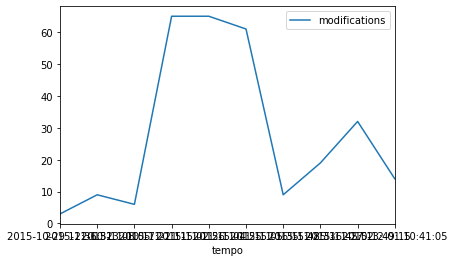

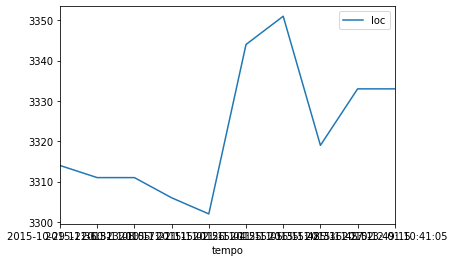

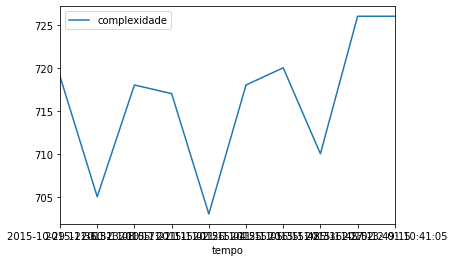

In [38]:
df_x_tempo_modifications.plot('tempo', 'modifications')
df_x_tempo_loc.plot('tempo', 'loc')
df_x_tempo_complexidade.plot('tempo', 'complexidade')

### Pega os 100 arquivos mais modificados na versão analisada

In [39]:
df_100_arquivos_mais_modificados = pd.read_csv(filepath_or_buffer=util_designite.PATH_ARQUIVOS_MODIFICADOS_V_3_1_0 + '/' + 'pega_100_arquivos_mais_modificados.csv', sep=',', encoding='utf-8')
df_100_arquivos_mais_modificados.sort_values(by=['modifications'], ascending=False, inplace=True)
df_100_arquivos_mais_modificados.head(10)

,file,modifications
0,CHANGES.txt,69
1,build.xml,11
2,StorageService.java,10
3,NEWS.txt,8
4,ColumnFamilyStore.java,7
5,Gossiper.java,7
6,RowCacheTest.java,6
7,StorageProxy.java,6
8,changelog,5
14,SecondaryIndexTest.java,4


In [40]:
lista_100_arquivos_mais_moficads = []

for index, row in df_100_arquivos_mais_modificados.iterrows():
    lista_100_arquivos_mais_moficads.append(row['file'])

print(lista_100_arquivos_mais_moficads)

['CHANGES.txt', 'build.xml', 'StorageService.java', 'NEWS.txt', 'ColumnFamilyStore.java', 'Gossiper.java', 'RowCacheTest.java', 'StorageProxy.java', 'changelog', 'SecondaryIndexTest.java', 'SystemKeyspace.java', 'cqlsh.py', 'MigrationManager.java', 'cqlsh', 'NodeProbe.java', 'SecondaryIndexManager.java', 'StreamReader.java', 'SSTableRewriter.java', 'CompactionManager.java', 'GoogleCloudSnitchTest.java', 'QueryProcessor.java', 'cql3handling.py', 'CQLTester.java', 'CompressionMetadata.java', 'StreamReceiveTask.java', 'EC2SnitchTest.java', 'EndpointStateTest.java', 'VersionedValue.java', 'FailureDetector.java', 'EndpointState.java', 'AbstractColumnFamilyInputFormat.java', 'CompactionController.java', 'CloudstackSnitchTest.java', 'cassandra-driver-internal-only-3.0.0-6af642d.zip', 'TpStats.java', 'test_cqlsh_output.py', 'BufferedDataOutputStreamPlus.java', 'DataOutputBuffer.java', 'DataOutputBufferFixed.java', 'SafeMemoryWriter.java', 'DataOutputTest.java', 'ThreadPoolMetrics.java', 'Cassa

In [45]:
list_of_arquivos_modificados_3_1_0 = util_designite.extract_list_of_arquivos_modifiados(df_arquivos_modificados_v_3_1_0)

print('Fragmento...')
i = 1
for each in list_of_arquivos_modificados_3_1_0:
    if i < 20:
        print(each[1], each[2], each[3], each[5], each[6], each[7])
        i += 1
print('...')

Fragmento...
StorageService.java 6bad57fc3cf967838a220d8402db37ed9a5b3b4e 65 3306 717 org.apache.cassandra.service
StorageService.java 6bb6bb005197c33fa94026d472ff78d4f36613cc 65 3302 703 org.apache.cassandra.service
StorageService.java 9a90e9894e9e079058876cf2b16a47d29ba0a32a 61 3344 718 org.apache.cassandra.service
StorageService.java ecd66de2bdf2ecb88c4276a4616a76f5ec2921bb 6 3311 718 org.apache.cassandra.service
StorageService.java a8e8a67306c0b26b8fe9c74a1fb00bacfa224cf7 3 3314 719 org.apache.cassandra.service
StorageService.java 99b82dbb43277035562e7b82bb9bdebd84510e96 9 3311 705 org.apache.cassandra.service
StorageService.java ae315b5ec944571342146867c51b2ceb50f3845e 9 3351 720 org.apache.cassandra.service
StorageService.java 7650fc196341bd673626054593f2ce6e895d7783 32 3333 726 org.apache.cassandra.service
StorageService.java 51753263a4c4d50c5bbe7bb80636cca5b6458ecf 14 3333 726 org.apache.cassandra.service
StorageService.java 15f03ab446854cf4d2999c3785d145c89bc3a3e4 19 3319 710 

# Procura pelos arquivos modificados que tem dependencia cíclica de pacotes

In [46]:
lista_pacotes_com_dependencia_ciclica = []
i = 1
for each in list_cyclic_dependency_v_3_1_0:
    elemento = each[2]
    elemento = elemento.replace(' ', '')
    elemento = elemento.replace(';', ',')
    lista_pacotes_com_dependencia_ciclica.append(elemento)
    i += 1

lista_pacotes_com_dependencia_ciclica

['org.apache.cassandra.metrics,org.apache.cassandra.utils',
 'org.apache.cassandra.metrics,org.apache.cassandra.utils,org.apache.cassandra.db',
 'org.apache.cassandra.tracing,org.apache.cassandra.concurrent',
 'org.apache.cassandra.tracing,org.apache.cassandra.utils,org.apache.cassandra.concurrent',
 'org.apache.cassandra.tracing,org.apache.cassandra.utils,org.apache.cassandra.concurrent,org.apache.cassandra.service',
 'org.apache.cassandra.locator,org.apache.cassandra.db',
 'org.apache.cassandra.locator,org.apache.cassandra.gms,org.apache.cassandra.db',
 'org.apache.cassandra.locator,org.apache.cassandra.gms,org.apache.cassandra.net,org.apache.cassandra.service',
 'org.apache.cassandra.locator,org.apache.cassandra.gms,org.apache.cassandra.net,org.apache.cassandra.dht,org.apache.cassandra.service',
 'org.apache.cassandra.net,org.apache.cassandra.dht',
 'org.apache.cassandra.net,org.apache.cassandra.dht,org.apache.cassandra.gms',
 'org.apache.cassandra.net,org.apache.cassandra.dht,org.a

# Procura os arquivos modificados que possuem Feature Concentration

In [47]:
lista_arquivos_modificados_com_feature_concentration = []

for each_am in list_of_arquivos_modificados_3_1_0:
    elemento_am = each_am[1]
    elemento_am = elemento_am.replace('.java', '')    
    for each_fc in list_feature_concentration_v_3_1_0:
        pacote_fc = each_fc[0]
        elemento_fc = each_fc[2]
        if elemento_am in elemento_fc:
            conteudo = (pacote_fc, each_am[1])
            lista_arquivos_modificados_com_feature_concentration.append(conteudo)

print(list(set(lista_arquivos_modificados_com_feature_concentration) ) )

[('org.apache.cassandra.streaming.messages', 'IncomingFileMessage.java'), ('org.apache.cassandra.hadoop.cql3', 'CqlRecordWriter.java'), ('org.apache.cassandra.io.util', 'DataOutputBufferFixed.java'), ('org.apache.cassandra.metrics', 'ThreadPoolMetrics.java'), ('org.apache.cassandra.tools', 'NodeTool.java'), ('org.apache.cassandra.cql3', 'QueryProcessor.java'), ('org.apache.cassandra.transport.messages', 'Schema.java'), ('org.apache.cassandra.cql3', 'Json.java'), ('org.apache.cassandra.io.util', 'RandomAccessReader.java'), ('org.apache.cassandra.cql3.statements', 'DropTypeStatement.java'), ('org.apache.cassandra.tools.nodetool', 'FailureDetector.java'), ('org.apache.cassandra.metrics', 'EstimatedHistogram.java'), ('org.apache.cassandra.metrics', 'CASClientRequestMetrics.java'), ('org.apache.cassandra.io.compress', 'CompressionMetadata.java'), ('org.apache.cassandra.db', 'SystemKeyspace.java'), ('org.apache.cassandra.service', 'ActiveRepairService.java'), ('org.apache.cassandra.locator',